# First example of the maximum likelihood principle: throwing a die 


**Goal:** In this notebook you will learn about the maximum likelihood principle. 

Learn about the maximum likelihood approach by doing a little die throwing experiment: First determine the number of upcoming dollar signs,  if you assume that you throw a die with a dollar-sign on one face. Then turn the game around and use the maximum likelihood principle to estimate the most likely number of faces with a dollar-sign on a die, if you observe for example 2 dollar signes in 10 throws. 

In a second experiment you will investigate the numerical stability of the product of probabilities and compare it with the (improved) stability of the sum of the logs of these probailities. With this you get a feeling why optimizing the joint log-likelihood is computationally more stable than optimizing the joint likelihood. 

**Usage:** Before working through this notebook we recommend to read chapter 4.1. The idea of the notebook is that you  getter a better understanding of the maximum likelihood principle by running the code, try understanding the code, checking the output, and playing with the notebook by slightly changing the code and rerunning it. 

**Content:**
* calculate the probability of all possible number of successes in a binomial experiment
* visualize the resulting binomial probability distribution
* apply the maximum likelihood principle to estimate the parameter p of the binomial distribution 
* show that calculating the product of many probabilities (which are <= 1) leads to numerical instabilities which are not observed when calculating the sum of the log of these probabilities.


| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_04/nb_ch04_01.ipynb)



#### Imports

In [0]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [3]:
# Assume a die with only one face with a dollar sign
# Calculate the probability to observe in 10 throws 1- or 2-times the $-sign
# See book section 4.1
10*(1/6)*(5/6)**9, 45*(1/6)**2*(5/6)**8

(0.3230111657796916, 0.2907100492017224)

### Working with the binomial distribution

You can work with the binomial distribution, to determine the probability to observe a certain number of the dollar-signs in 10 throws. The binomal distribution has two parameters: the number of tries n (here we have 10 throws of the die, hence n=10) and the probability for sucess in one try p (because we assume a fair die with a dollar-sign on one face we have p=1/6). To calculate the probability of k successes (observed dollar-signs) in n tries (throws) you can use the function *binom.pmf*. To visualize the probability distribution you determine the probability for 0, 1, 2, ...10 successes in ten tries and plot them versus the number of successes.

Text(0, 0.5, 'Probability')

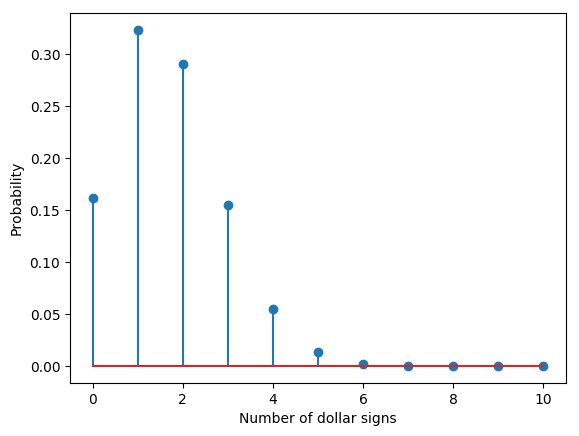

In [4]:
from scipy.stats import binom
# Define the numbers of possible successes (0 to 10)
ndollar = np.asarray(np.linspace(0,10,11), dtype='int') 
# Calculate the probability to get the different number of possible successes
pdollar_sign = binom.pmf(k=ndollar, n=10, p=1/6)  #B    
plt.stem(ndollar, pdollar_sign)
plt.xlabel('Number of dollar signs')
plt.ylabel('Probability')


### Exercise 1

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Let's assume you observed k=2 dollar signs in n=10 throws. What do you think - how many dollar-signs are on the thrown die?*

Use the maximum likelihood approach to answer this question. To do so, follow the genius idea described in chapter 4.1 and determine the probability to observe 2 dollar-signs in 10 throws with the binomial distribution, when you assume that the die has a dollar-sign on 0,1,2 ..., or 6 faces. For which number of assumed dollar-signs on the die do you get the maximal likelihood? 

In [0]:
## Your code here. 

Scroll down after you finished the task

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

Text(0.5, 1.0, 'Unnormalized likelihoods')

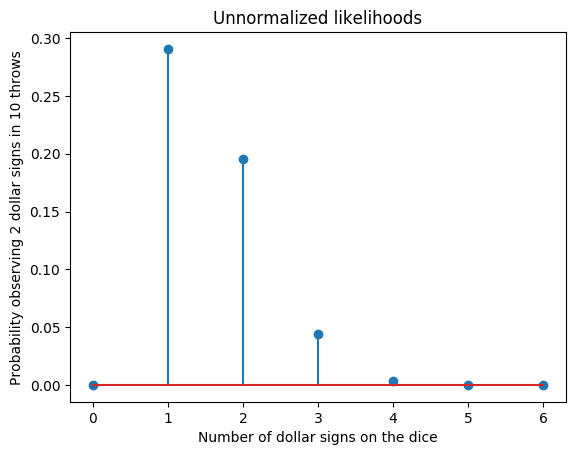

In [5]:
# Solution
from scipy.stats import binom
# define the considered numbers of dollar signs on the die (zero to six):
ndollar = np.asarray(np.linspace(0,6,7), dtype='int')
# calculate the corresponding probability of getting 2 $-sings in 10 throws
pdollar = binom.pmf(k=2, n=10, p=ndollar/6)           #B
plt.stem(ndollar, pdollar)
plt.xlabel('Number of dollar signs on the dice')
plt.ylabel('Probability observing 2 dollar signs in 10 throws')
plt.title('Unnormalized likelihoods')


From this distribution it gets clear, that the probablity to observe 2 dollar-signs in 10 throws is maximal if the die has only  1 face with a dollar sign. Therefore the corresponding maximum likelihood estimate for the parameter p  in the binomial distribution is p=1/6.

# Numerical Stability


### The product of probabilities.

To calculate the joint likelihood you have to determine the product of many probabilities. As you can see in the following, mulitiplying many values between zero and one, leads to very small values which is set to zeroin python, if the number gets too small.   
To demonstrate this, we sample 100 values from an uniform distribution with min = 0 and max = 1, then we take the product of those values and do the same for a 1000 values. 


In [6]:
vals100 = np.random.uniform(0,1,100)
vals1000 = np.random.uniform(0,1,1000)
x100 = np.product(vals100) 
x1000 = np.product(vals1000) 
print(x100, x1000)

3.0232931455990027e-50 0.0


When multilying 100 values you get a very very small number but for 1000 values you get 0.0, this is due to the limited precision of the float numbers in a computer. But this is a real problem, because it looks like that joint likelihood is zero, but its not (its just very small due to the large amount of data).


### Taking the log does not change the position of the maximum

In the next cell we show that the x value which gives the position of the maximum of the function f(x), gives also the position of the maximum of log(f(x)). For demonstration, we use the absolute values of the product of two sine waves as our function f(x) and take the log of it.

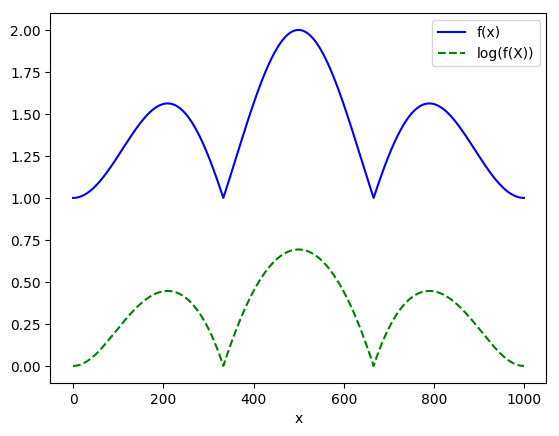

In [7]:
vals = 1 + np.abs(np.sin(np.linspace(0, 3*np.pi, 1000)) * np.sin(np.linspace(0, np.pi, 1000)))
plt.plot(range(0, 1000),vals,'b-')
plt.plot(range(0, 1000),np.log(vals),'g--')
plt.xlabel('x')
plt.legend(("f(x)","log(f(X))"),fontsize=10)

Here it is clearly visible: the maximum for both functions is at the same position.

### Takeing the logs and summing up.

If we take the log of a product it leads to $\log(A \cdot B) = \log(A) + \log(B)$  meaning that we can work with a sum of the logs (see book).  

Now you apply a log to the product of probailities which gives you a sum of logs of these probabilities. Remeber we have values from a uniform distribution with min = 0 and max = 1 (probabilities), which lead to numerical problems when calculating the product of theses probabilities.
As you can see now, on the log scale you don't have the problem of the numerical precision anymore. 

In [0]:
import numpy as np
log_x100 = np.sum(np.log(vals100)) 
log_x1000 = np.sum(np.log(vals1000)) 
log_x100, log_x1000 
# The product becomes the sum of the logs

(-103.11945326104436, -1063.3724269809086)

This result is quite important for implementing the maximum likelihood estimation procedure. In the maximum likelihood approach you want to determine the parameter value that yields the highest joint likelihood over all observed data. The very same parameter value will also maximize the joint log-likelihood. However, if you have a lot of data, the likelihood cannot be precisely determined, but the log-likelihood can. This is the reason why in DL you work with the negative log-likelihood as loss function instead of the negative likelihood.